In [205]:
#Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler

In [143]:
# Data IMporting
df1 = pd.read_csv(r"C:\Users\HP\Desktop\meriskill\Project 2\Project 2 MeriSKILL\diabetes.csv")

In [144]:
df1.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [145]:
print(df1.shape)
print('no of rows :',len(df))
print('No of column:',len(df.columns))

(768, 9)
no of rows : 768
No of column: 9


In [146]:
# Basic information about the dataset
df1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [147]:
# checking duplicates
df1.duplicated().sum()

0

In [148]:
# null check or missing value checking
df1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [149]:
df1.nunique() # Number of unique values in each column

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [150]:
# Statistics
df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [156]:
# first copy the original data 
df = df1.copy()
# now filling the missing values with the median value of the particular columns
df['Glucose'] = df1['Glucose'].replace(0, df1['Glucose'].median())
df['BloodPressure'] = df1['BloodPressure'].replace(0, df1['BloodPressure'].median())
df['SkinThickness'] = df1['SkinThickness'].replace(0, df1['SkinThickness'].median())
df['Insulin'] = df1['Insulin'].replace(0, df1['Insulin'].median())
df['BMI'] = df1['BMI'].replace(0, df1['BMI'].median())

In [157]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Data visualization

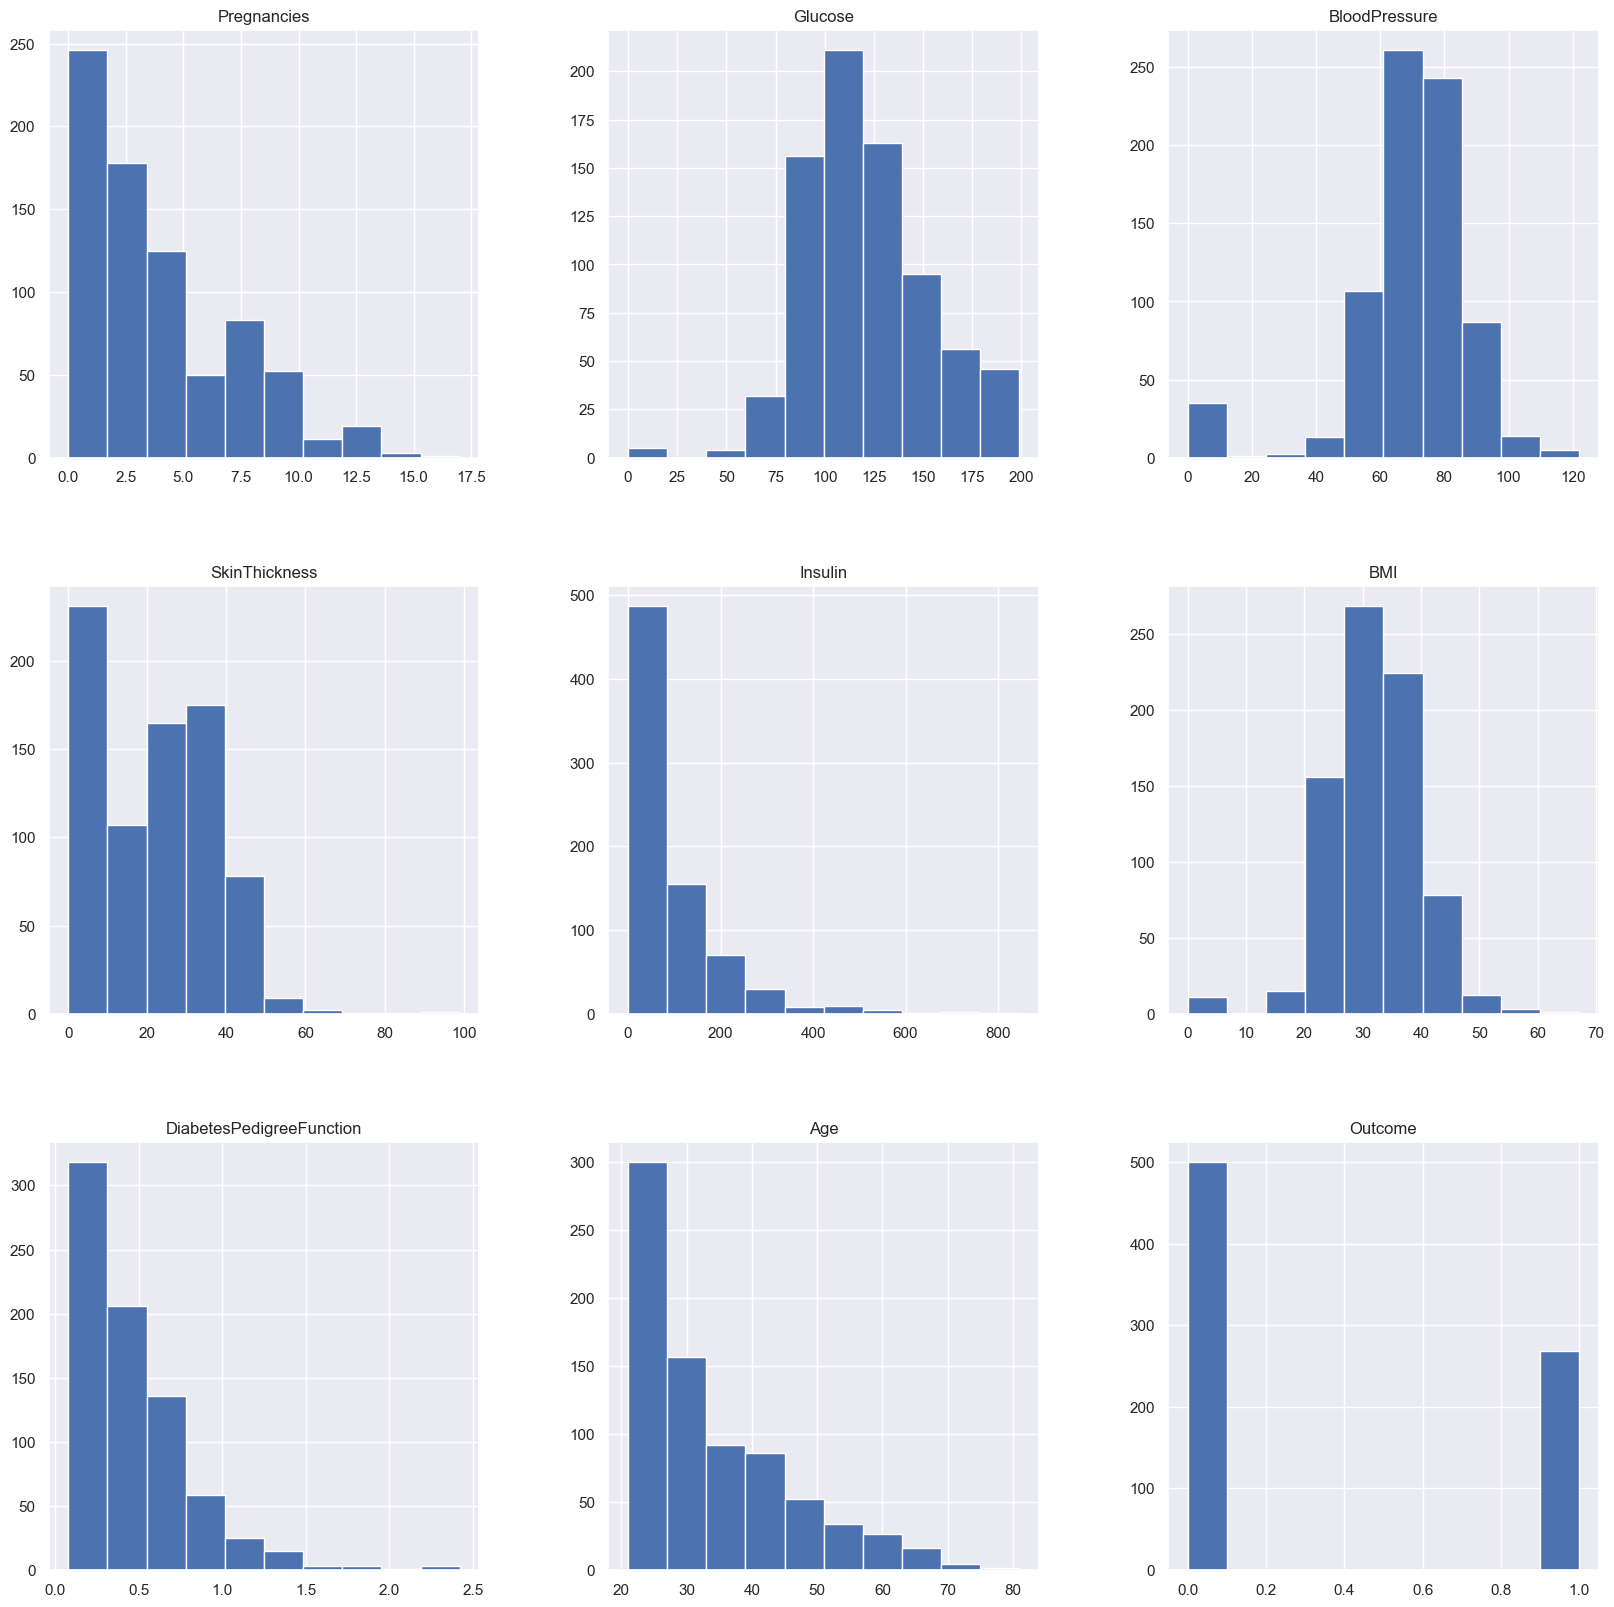

In [204]:
# Visualization the histograms before replacement
data.hist(figsize=(20,20))
plt.show()

### 1.Distribution of Pregnancies

In [158]:
df['Pregnancies'].value_counts().sum()


768

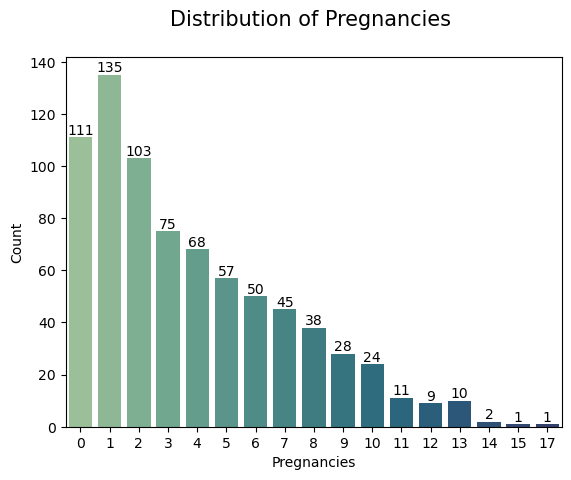

In [159]:
#Distribution of Pregnancies
ax = sns.barplot(x=df['Pregnancies'].value_counts().index,
                 y=df['Pregnancies'].value_counts(), palette='crest')
for bars in ax.containers:
    ax.bar_label(bars,size = 10)
plt.xlabel('Pregnancies', size = 10)
plt.ylabel('Count', size = 10)
plt.title('Distribution of Pregnancies \n', size = 15)
plt.show()

In [160]:
print(df['Pregnancies'].describe())
print('mean  of Pregnancies :',df['Pregnancies'].mean())
print('median  of Pregnancies :',df['Pregnancies'].median())

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64
mean  of Pregnancies : 3.8450520833333335
median  of Pregnancies : 3.0


## 2.Glucose Level 


C:\Users\HP\AppData\Local\Temp\ipykernel_18808\596724930.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data=df, x='Glucose', palette='flare')
C:\New\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


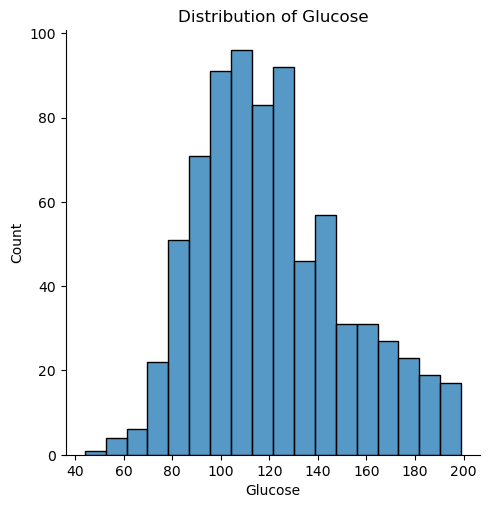

In [161]:
#  Distribution of Glucose

sns.displot(data=df, x='Glucose', palette='flare')
plt.title('Distribution of Glucose')
plt.xlabel('Glucose')
plt.ylabel('Count')
plt.show()

In [122]:
print("Median of Glucose: ", df["Glucose"].median())
print("Maximum of Glucose: ", df["Glucose"].max())
print("Mean of Glucose: ", df["Glucose"].mean())

Median of Glucose:  117.0
Maximum of Glucose:  199
Mean of Glucose:  120.89453125


## 3.Blood Pressure

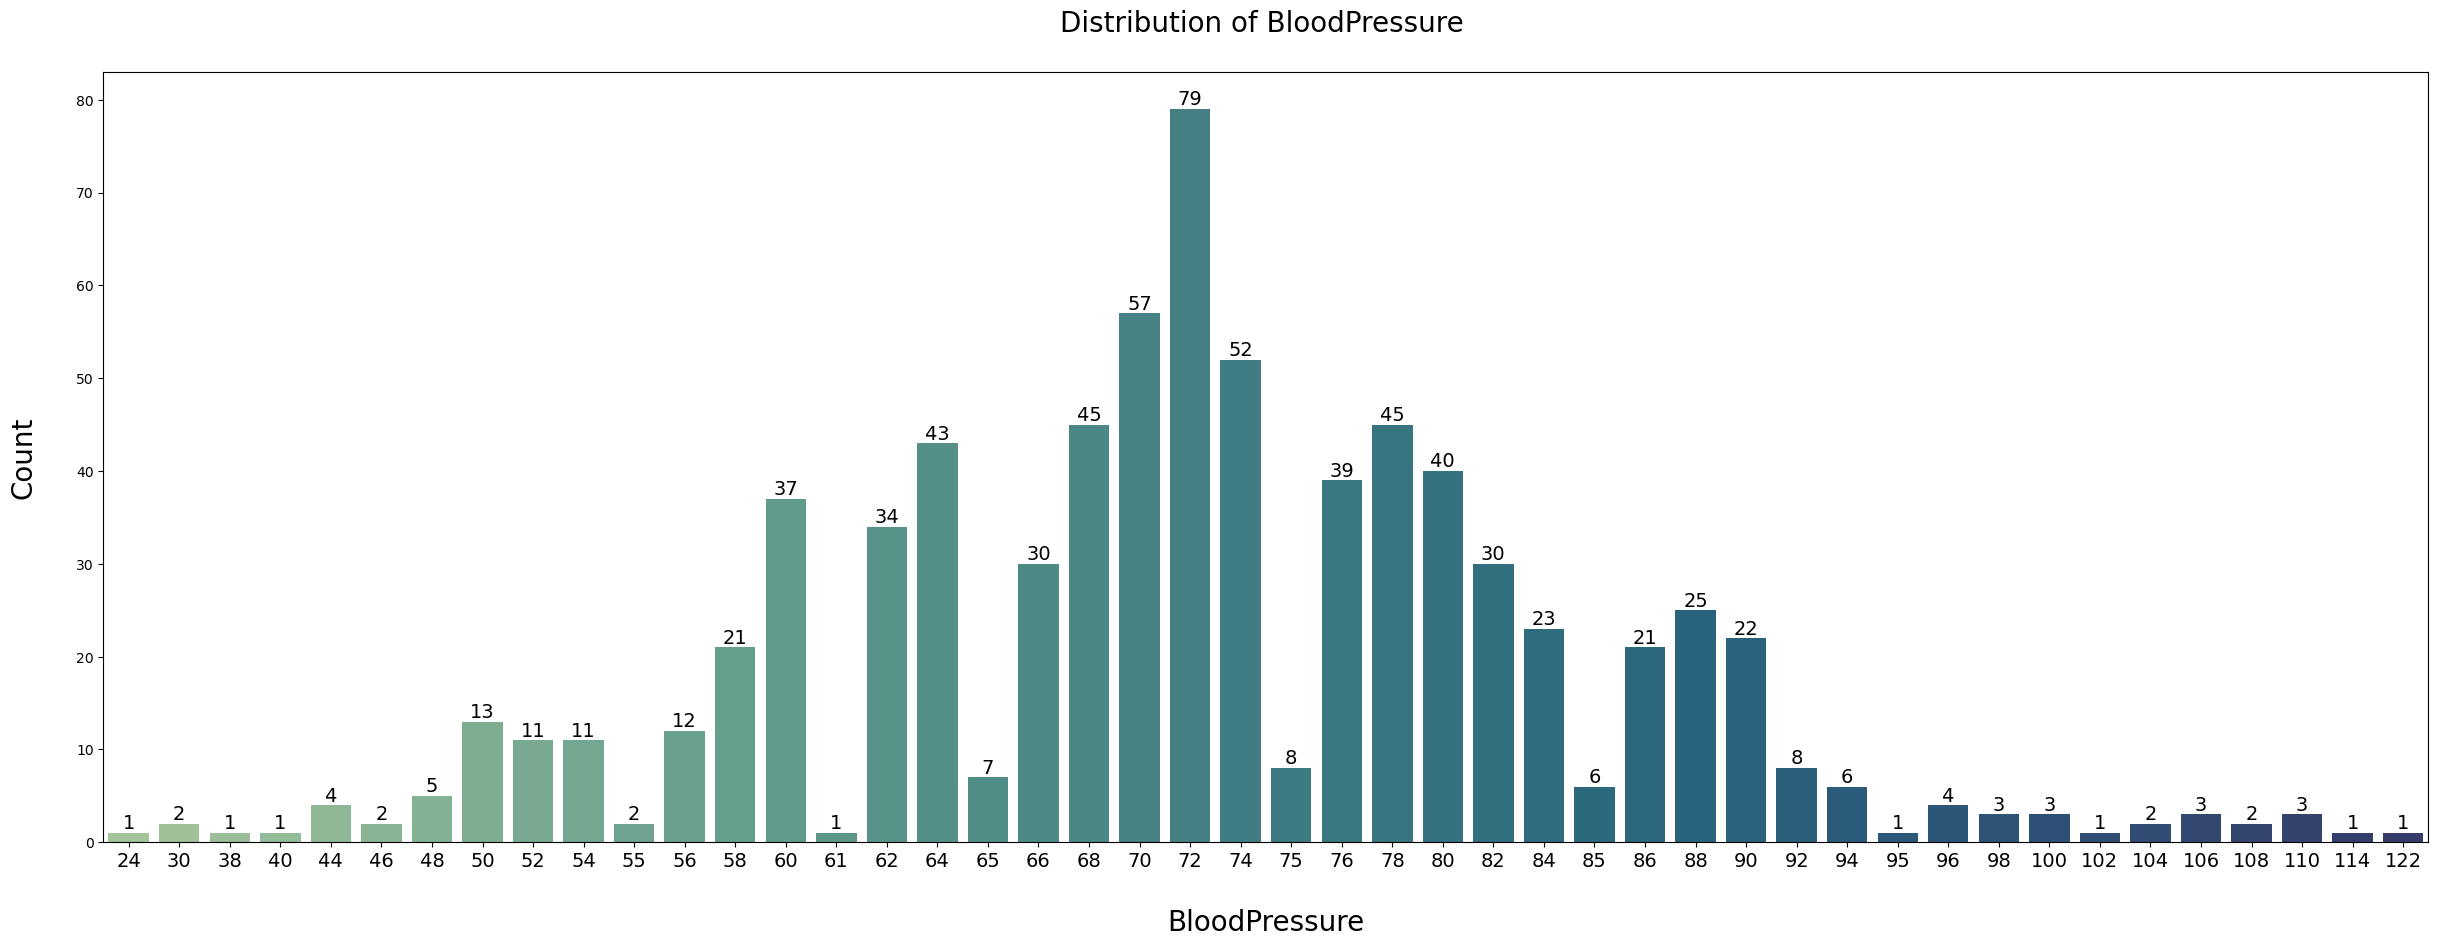

In [162]:
# Distribution of BloodPressure
plt.figure(figsize= (30,10 ))
ax = sns.countplot(data =df, x=df.BloodPressure,palette='crest')
for bars in ax.containers:
    ax.bar_label(bars,size = 14)
plt.title('Distribution of BloodPressure \n', size= 20)
plt.xlabel("\nBloodPressure",size = 20)
plt.ylabel("Count\n",size =20)
plt.xticks(rotation = 0,size= 14)
plt.show()

## 4.Insulin

C:\Users\HP\AppData\Local\Temp\ipykernel_18808\3160179880.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data =df, x=df.Insulin,palette='crest')
C:\New\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


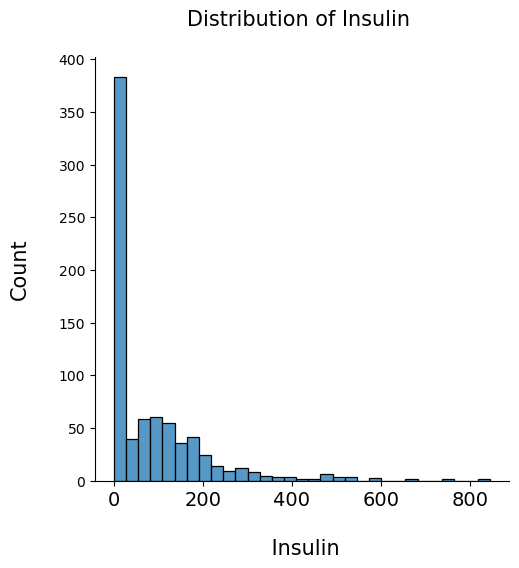

In [124]:
# Distribution of Insulin

sns.displot(data =df, x=df.Insulin,palette='crest')

ax=plt.title('Distribution of Insulin \n', size= 15)
plt.xlabel("\n Insulin",size = 15)
plt.ylabel("Count\n",size =15)
plt.xticks(rotation = 0,size= 14)
plt.show()

## 5.BMI Distribution

C:\New\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


AttributeError: 'FacetGrid' object has no attribute 'bar_label'

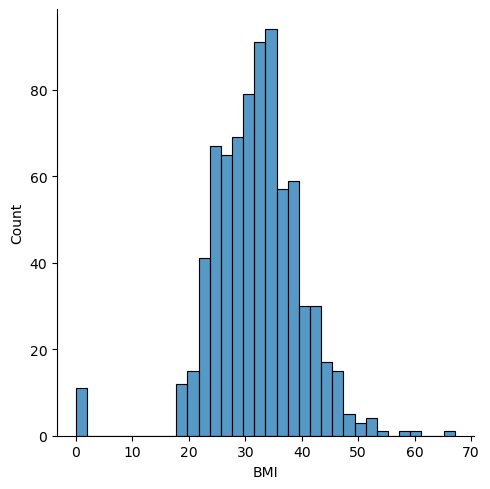

In [125]:
# Distribution of BMI
bx=sns.displot(x="BMI",data=df)
bx.bar_label(type.containers[0], fontsize=1)
plt.title("Distribution of BMI", size = 14)

plt.show()

In [ ]:
print("Median of BMI: ", df["BMI"].median())
print("Maximum of BMI: ", df["BMI"].max())
print("Mean of BMI: ", df["BMI"].mean())

## 6.Diabetes Pedigree Function

C:\New\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


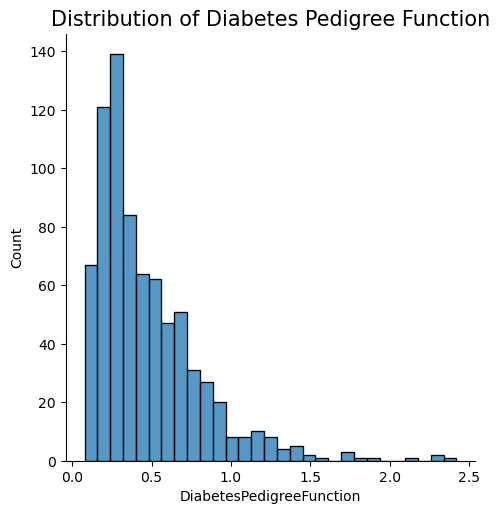

In [167]:
# Distribution of DiabetesPedigreeFunction
df["DiabetesPedigreeFunction"].replace([np.inf, -np.inf], np.nan, inplace=True)
sns.displot(data=df, x="DiabetesPedigreeFunction")
plt.title("Distribution of Diabetes Pedigree Function", size = 15)
plt.show()

### Heat map

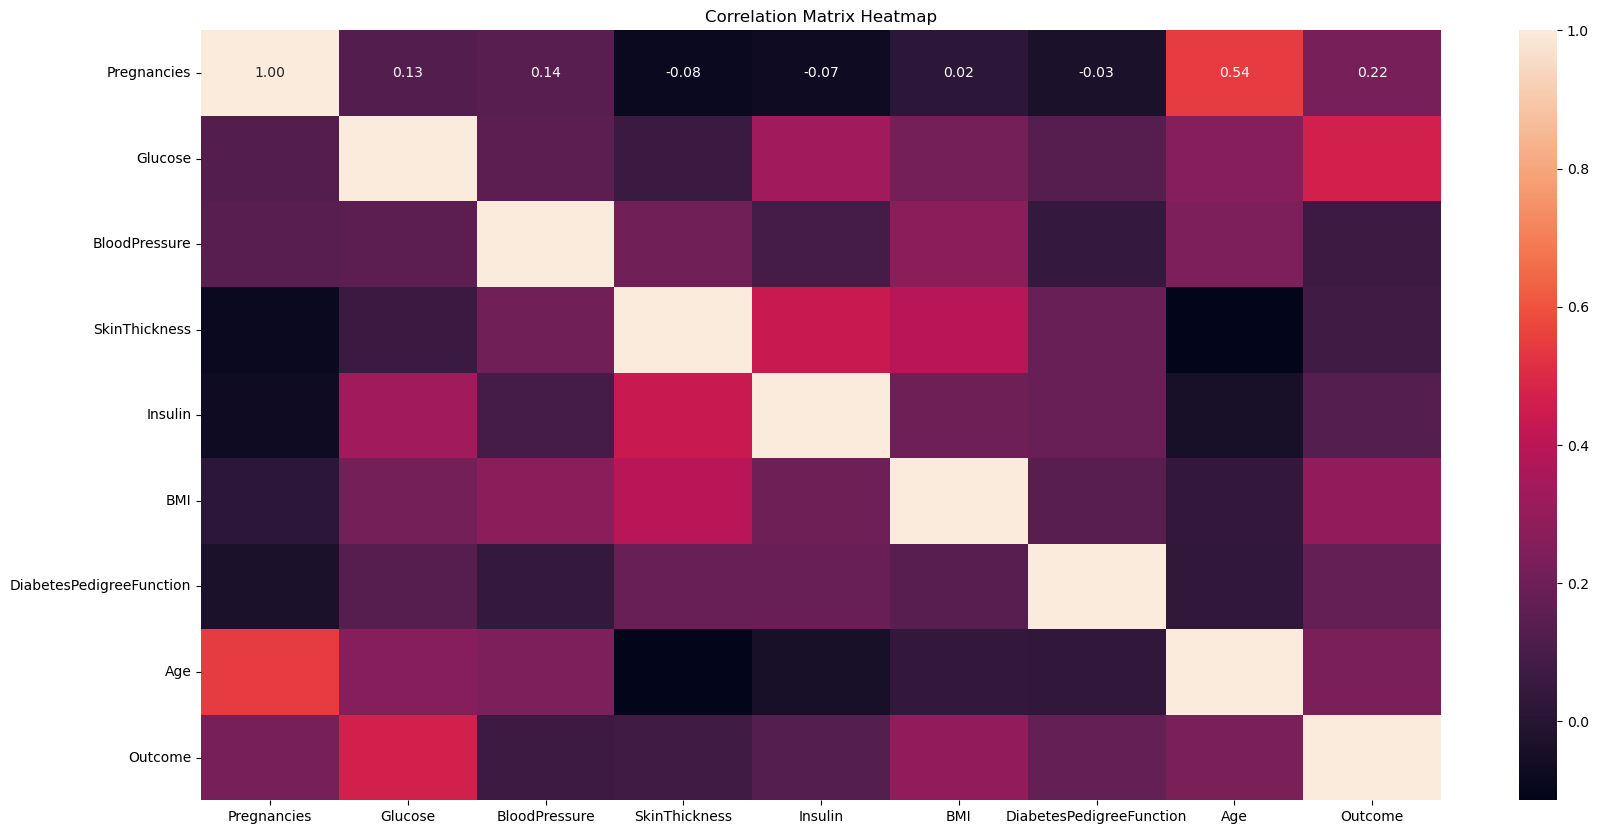

In [136]:
# correrletion matrix
corr_matrix = data.corr()

fig20, ax20 = plt.subplots(figsize=(20, 10))
dataplot = sns.heatmap(data=corr_matrix, annot=True, ax=ax20, fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [140]:
data_cp

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,30.5,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,23,30.5,30.1,0.349,47,1


### Multivariate Analysis

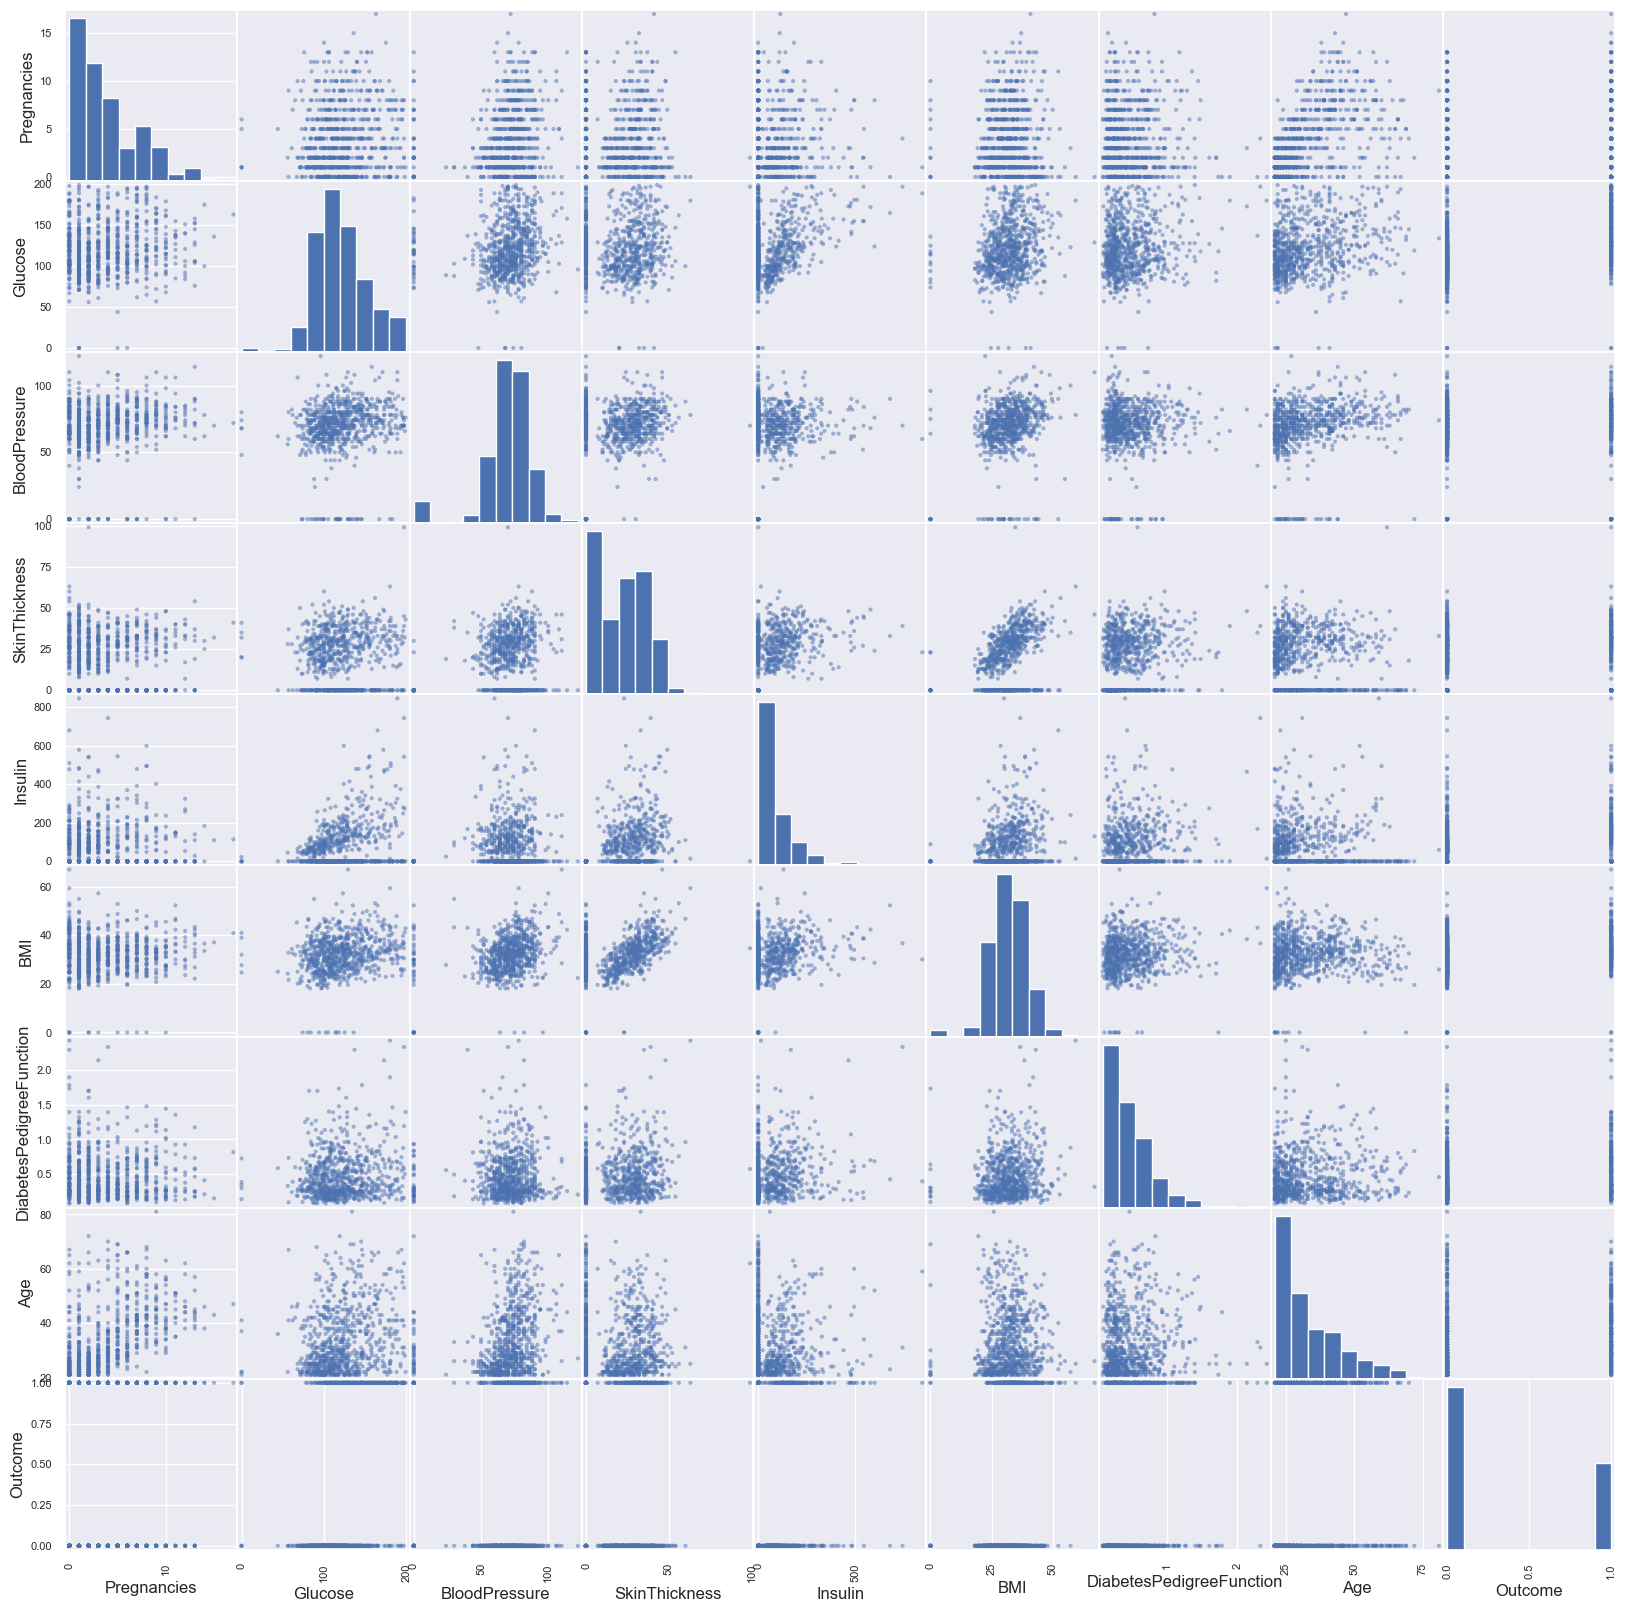

In [206]:

P = scatter_matrix(data, figsize=(20,20))

### 7.Age distribution

C:\New\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


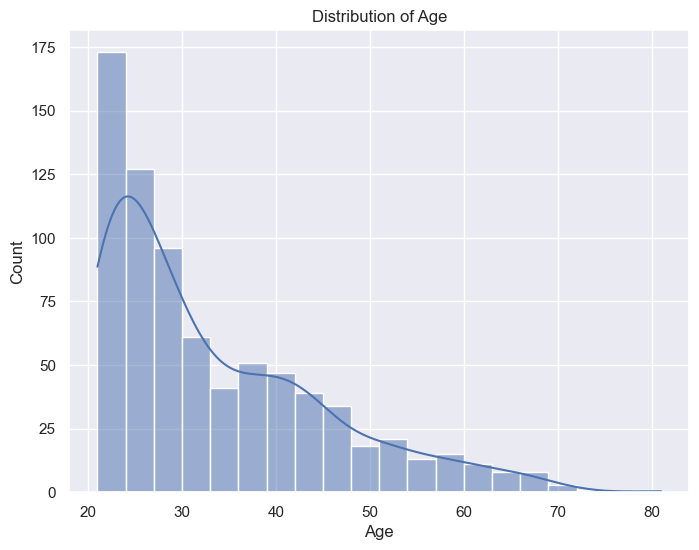

In [209]:
# Age distribution of Counts
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### 8.Outcome

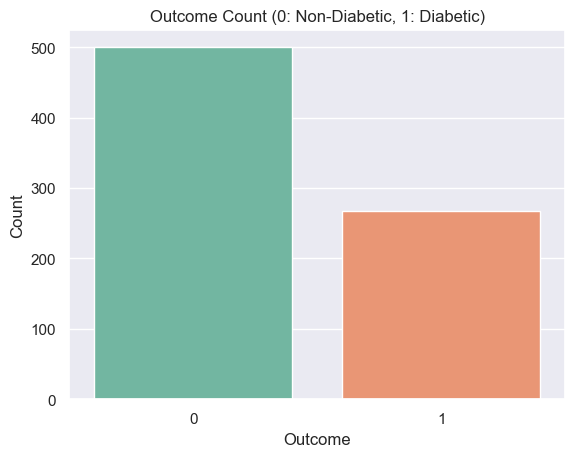

In [188]:
# Outcomes Analysis
sns.countplot(data=df, x='Outcome', palette='Set2')
plt.title('Outcome Count (0: Non-Diabetic, 1: Diabetic)')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()